In [1]:
import pandas as pd
import re
import csv

data_type = 'users'

crld = True

m = 25
exp = 2



if crld:
    csv_dir = '../data/2016_2019/samples/'
    e = '_' + str(m) + 'e' + str(exp)
    csv_path = csv_dir + data_type + e + '.csv'
else:
    csv_dir = '../data/2016_2019/full/'
    e = ''
    csv_path = csv_dir + data_type + e + '.csv'

print csv_path

../data/2016_2019/samples/users_25e2.csv


In [2]:
url_pattern = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
re_url = re.compile(url_pattern)

In [22]:
has_url_str = 'this should return true https://dekoracjadomu.pl/koopman-wazon-geometryczny-ceramika-golebi'
has_url = bool(re_url.search(has_url_str))

no_url_str = 'this should return false dekoracjadomu.pl/koopman-wazon-geometryczny-ceramika-golebi'
no_url = bool(re_url.search(no_url_str))

large_url_str= '<a href=""http://sk.sizexxlmatter.com"">http://sk.sizexxlmatter.com</a> A special mention to put natural cures, substances that would generally be located in your body along with which is often used while dietary supplements to aid get the necessary ranges to take place.'
# larger_test = 'A special mention to put natural cures, substances that would generally be located in your body along with which is often used while dietary supplements to aid get the necessary ranges with an penile erection to take place.'
large_url = bool(re_url.search(large_url_str))


print 'DOES THE STRING CONTAIN A URL?\n'
print 'has_url:', has_url, '\n', 'no_url:', no_url, '\n', 'large_url:', large_url
# True, False, True

DOES THE STRING CONTAIN A URL?

has_url: True 
no_url: False 
large_url: True


In [23]:
# NOTE: SAMPLE SIZE WILL NOT EQUAL DF LENGTH B/C SAMPLE CONTAINS N LINES WHICH INCLUDE LINE BREAKS
# AND PANDAS WILL NOT "SEE" THE LINE BREAKS AND INSTEAD PARSE THEM AS STRING LITERALS (I THINK THAT'S WHAT THEY'RE CALLED)
# FOR COMPARISON SEE OTHER VERSION BELOW

use_cols = ['id', 'username', 'created_at', 'bio']
users = pd.read_csv(csv_path, usecols=use_cols, parse_dates=['created_at'], na_filter=False) # na_filter removes NaN's when empty string
print users.shape

(1048, 4)


In [24]:
with open(csv_dir + 'users' + e + '.csv') as csv_file:
    reader = csv.DictReader(csv_file) # add settings as needed
#     rows = [row for row in reader]
    rows = list(reader)

# RIGHT NOW, I STILL WANT TO KNOW WHERE THEY WERE FOR DATA "COMPLETENESS"
for row in rows:
    row['bio'] = row['bio'].replace('\r', '|R').replace('\n', '|N')
    
len(rows)

1048

In [6]:
# users.head(10)

In [7]:
# users.tail(10)

In [26]:
users['has_url'] = users['bio'].str.contains(re_url, na=False)
users.tail(5)

,id,username,created_at,bio,has_url
1043,582589,kstroms,2019-04-04 22:59:30+00:00,,False
1044,582590,jrhdds,2019-04-04 23:10:13+00:00,Lived on and recreated in Great Lakes area for...,False
1045,582591,judyacarpenter,2019-04-04 23:33:49+00:00,Selecting the ideal luxury travel agency can b...,True
1046,582592,pokerqqcommm,2019-04-04 23:39:22+00:00,CapriPoker99 Merupakan Agen IDN poker dengan p...,True
1047,582593,amerlab,2019-04-04 23:44:02+00:00,Amerlab.com provides acid purification system ...,True


In [27]:
users['bio_length'] = users['bio'].str.len()
users.tail(5)

,id,username,created_at,bio,has_url,bio_length
1043,582589,kstroms,2019-04-04 22:59:30+00:00,,False,0
1044,582590,jrhdds,2019-04-04 23:10:13+00:00,Lived on and recreated in Great Lakes area for...,False,137
1045,582591,judyacarpenter,2019-04-04 23:33:49+00:00,Selecting the ideal luxury travel agency can b...,True,271
1046,582592,pokerqqcommm,2019-04-04 23:39:22+00:00,CapriPoker99 Merupakan Agen IDN poker dengan p...,True,180
1047,582593,amerlab,2019-04-04 23:44:02+00:00,Amerlab.com provides acid purification system ...,True,266


In [29]:
url = users['has_url'] == False
bio_length = users['bio_length'] > 0
no_url = users.loc[url & bio_length]
no_url.shape

(91, 6)

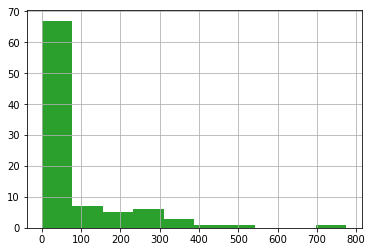

In [148]:
no_url['bio_length'].hist()
plt.show()

In [11]:
# RESULTS MOVED TO GIST: 
# for uid, bio in zip(no_url['id'].values, no_url['bio'].values):
#     print str(uid) + ':', bio

In [ ]:
# 481717
# 481996: fencing pricing
# 482003: fencing prices
# 482009: fencing company
# 482024: cost to fence yard
# 482029: privacy fence supplies
# 482036: commercial fences
# 482041: perimeter fencing
# 482043: price for fencing
# 482047: fence cost
# 482055: pool safety fence
# 482056: prices for fence panels
# 482059: outside fences
# 482060: home fencing
# 482061: types of fences
# 482063: livestock fence
# 482064: security fences
# 482067: fence companies
# 482082: vinyl fence companies
# 482090: livestock fence
# 482091: buy fences
# 82097: buy vinyl fence
# 482100: price fencing
# 482103: prices for fencing materials
# 482104: cost for fence
# 482116: privacy fences
# 482121: fence backyard
# 482136: safety pool fence
# 482148: prefab fences
# 482150: fence for house
# 482158: security fence
# 482164: fencing supply
# 482178: vinyl fencing installation
# 482182: pvc fencing installation
# 482184: white vinyl fencing
# 482186: fences
# 482196: picket fence panels
# 482200: post fences
# 482201: fence building supplies
# 482207: fencing for privacy
# 482211: rod iron fence
# 482217: garden fence post
# 482240: vinyl fence panels
# 482245: plastic fence panels
# 582262: A leading technology venture and game development company in Duabi, UAE. Juego Studios provides high-quality design and development solutions for games, apps, virtual reality, augmented reality, AI, machine learning, simulation, Big Data, IoT and more.
# 582263: Elite Bond Cleaning Brisbane is a well-known cleaning company in Brisbane city. We in Elite Bond Cleaning Brisbane, providing end of lease cleaning services from last 10 years. We have well-trained cleaners and they are the best in their field. Our cleaning quality and affordable price is our strength for which, we are known in the market. Our cleaners do their best in cleaning and our cleaning is up to the real estate standards. We provide our cleaning services in all suburbs in Brisbane. We offer a 100% satisfaction guarantee and that's why we are providing 7 days of service guarantee to our customers.  We offer every day an attractive discount on our all services. Book your bond cleaning services with us and relax about your bond money with our cleaning quality.
# 582281: Dr. Hanna specializes exclusively in Facial Cosmetic Surgery and has completed thousands of facelifts, nose jobs and eye jobs over the past 30 years. Dr. Hanna is affiliated to the American Academy of Facial Plastic & Reconstructive Surgery Inc
# 582312: this is a online platform where you can get clear idea about new technologies in health.
# 582395: Game Ceme Keliling yang paling populer ini bisa membuat anda mendapatkan keuntungan besar dari deposit 10 ribu saja. Karena game ceme keliling ini telah tersedianya sebuah :
# 582431: Casey Powell is an expert Cosmetic Injector and Skin Care Professional in Santa Monica, California.  Casey has honed her aesthetic judgment through years of experience in the field of injectable neurotoxins, fillers, and skincare. 
# 582434: Ob Kirschlorbeer oder Moringa, ob Gartenzubehör oder Gartengerät – wir sind da, wenn Sie uns brauchen.Aufgrund einer engen Zusammenarbeit mit Baumschulen aus der Region gelingt es uns, Ihnen frische Kirschlorbeere nach Hause zu liefern.
# 582448: Dyer Aqua LLC. is the upmost company that is best commercial production of numerous marine fish species. We provide full customer service with 100 percent guarantee. Buy from us! For delivery at your doorstep, call us right now - 786-579-0188.
# 582479: Kuala Lumpur is a city full of a different mix of cultures and art: traditional to modern, street to couture, local to international. Yet, they are all mixed together perfectly in a beautiful chaotic way. Just like KL, The Red Hog's food concept is about mix and match and in many cases – a mismatched! But definitely, The Red Hog is not a traditional old fashioned restaurant.
# 582491: IACG’s Multimedia curriculums have been prepared in consultation with highly successful professionals in the field of Animation, VFX, Gaming and Film Making, with one of the best infrastructures in the Multimedia Industry.
# 582495: o need to worry, when technical issues are coming in your printer, as we have a help desk for you to get that fixed. I am Jon Mark, highly experienced technician, giving you instant printer support
# 582497: We focus on surpassing your company from every aspect and putting it at forefront. Join hands with us to enhance brand awareness and get more people talk about your brand
# 582504: Max BPO delivers superior outsourcing services with 22+ years of experience and 30 countries like USA, UK, Canada, Germany and Australia etc. Max BPO outsourcing offers a range of individually designed BPO solutions. Our service verticals spans call center, back office operation, healthcare BPO, logistics BPO, finance accounting, digital publishing and much more.
# 582514: Steelbird, a reputable name in the automotive components manufacturing industry, has been driven with a penchant for achieving excellence in its domain of work for more than five decades. A futuristic vision has guided our path of success all these years making us a market leader in our product segments. Today, Steelbird is the first choice of automotive industry for rubber components, filters and plastic components.
# 582534: Docente en ciencias
# 582585: BTPoxycrete offer custom countertop and flooring resurfacing systems in Buffalo NY. We use the best concrete and epoxy products thus ensuring quality services.

In [ ]:
# SO OF 91 BIOS W/O A URL, 60 WERE SPAM

In [30]:
url = users['has_url'] == True
bio_length = users['bio_length'] > 0
has_url = users.loc[url & bio_length]
has_url.shape

(850, 6)

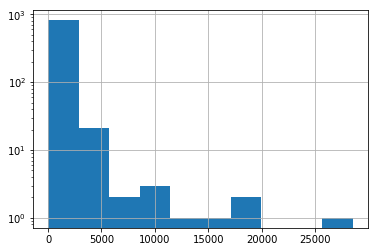

In [162]:
has_url['bio_length'].hist(log=True)
plt.show()

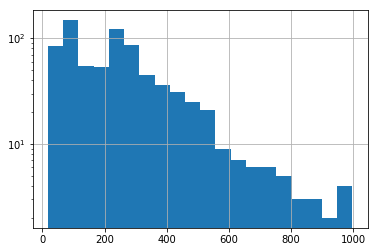

In [166]:
has_url['bio_length'][has_url['bio_length'] <= 1000].hist(log=True, bins=20)
plt.show()

In [ ]:
# THIS IS WHAT 1000 CHARACTERS LOOKS LIKE:

# Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut 
# labore et dolore magna aliqua. Mattis aliquam faucibus purus in. Ut etiam sit amet nisl. 
# Ullamcorper dignissim cras tincidunt lobortis feugiat. Sit amet volutpat consequat mauris nunc 
# congue nisi vitae. Lectus magna fringilla urna porttitor rhoncus dolor purus. Facilisis volutpat 
# est velit egestas dui id ornare. Nec nam aliquam sem et tortor consequat id. Tempor nec feugiat 
# nisl pretium fusce. Ac orci phasellus egestas tellus rutrum tellus pellentesque. Feugiat pretium 
# nibh ipsum consequat nisl. Tristique senectus et netus et malesuada fames ac turpis. Convallis 
# convallis tellus id interdum. Tristique senectus et netus et. Faucibus vitae aliquet nec 
# ullamcorper sit amet risus nullam. Cras ornare arcu dui vivamus arcu felis bibendum ut tristique. 
# Semper feugiat nibh sed pulvinar proin gravida hendrerit. Duis tristique sollicitudin nibh sit 
# amet commodo nulla. phasellus egestas tellus duis netus.

# SO QUESTION: HOW LONG WOULD A BIO BE *AND* HAVE A URL IN IT?

In [31]:
# pd.options.display.max_rows = 210
# has_url[(has_url['bio_length'] <= 100)]# & (has_url['bio_length'] <= 200)]
# # plt.show()

In [207]:
has_url.shape

(850, 7)

In [54]:
# begins_w_url = (has_url.loc[:,'bio'].str.startswith('<a href=') | has_url.loc[:,'bio'].str.startswith('http'))
has_url.loc[:,'begins'] = (has_url.loc[:,'bio'].str.startswith('<a href=') | has_url.loc[:,'bio'].str.startswith('http'))
has_url.head()

,id,username,created_at,bio,has_url,bio_length,begins
0,372.0,John_Wells,2016-09-09 14:17:26+00:00,"Kite aerial photographer with, and co-founder ...",1.0,151.0,False
2,481536.0,Leonwgy,2016-07-01 00:02:28+00:00,"<a href=""http://dekoracjadomu.pl/koopman-wazon...",1.0,117.0,True
3,481537.0,Mickmmt,2016-07-01 00:07:39+00:00,"<a href=""http://deasalus.eu/stomatologiczna"">h...",1.0,83.0,True
4,481538.0,Marielwosp,2016-07-01 00:10:17+00:00,"<a href=""http://sk.sizexxlmatter.com"">http://s...",1.0,293.0,True
5,481539.0,coffeybrosmoving,2016-07-01 00:41:31+00:00,Coffey Bros Moving\r\n\r\nAddress: 3236 N Pula...,1.0,490.0,False


In [71]:
begins_w_url = has_url.loc[has_url['begins'] == False]
begins_wo_url = has_url[has_url['begins'] == True]

print begins_w_url.shape, begins_wo_url.shape

(329, 7) (522, 7)


In [63]:
# bio_gt_1000 = has_url.loc[:,'bio_length'][has_url['bio_length'] > 1000]#.shape[0]
bio_gt_1000 = has_url[has_url['bio_length'] > 1000]#.shape[0]

bio_gt_1000.shape # LOOKED BY HAND, ALL SPAM

(99, 7)

In [67]:
begins_url = has_url['begins'] == False
bio_length = has_url['bio_length'] <= 1000
begin_url_lt_1000 = has_url[(begins_url & bio_length)]
begin_url_lt_1000.shape

(301, 7)

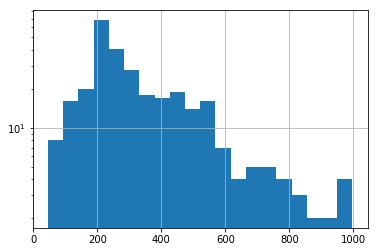

(301,)


In [220]:
has_url['bio_length'][begins_url & bio_length].hist(log=True, bins=20)
plt.show()
print has_url['bio_length'][begins_url & bio_length].shape

In [68]:
# begins_url = has_url['begins'] == False
# bio_length = has_url['bio_length'] <= 200
# has_url[begins_url & bio_length]
# plt.show()

In [219]:
not_spam = [372, 582421, 582295]

for uid in not_spam:
    print users[users['id'] == uid]['bio'].values
    
# SO REALLY ONLY 1, ASSUMING SOMEONE'S BIO IS LESS THAN 1000 CHARACTERS

['Kite aerial photographer with, and co-founder of, West Lothian Archaeology, a non-commercial community group:\r\nhttp://www.armadale.org.uk/phototech.htm']
['I am Shelia from USA. I am doing marketing for <a href="http://www.cross.tv/blog/145976">Be Choosy While Choosing Bracelets For Girlfriend</a>.']
['Internet advocate. Infuriatingly humble travel geek. Amateur zombie practitioner. Twitter trailblazer. Sales officer at https://www.insuranceleadsstore.com']


In [ ]:
import collections

spam_grams = collections.Counter()

bio_text = list(users['bio']

In [12]:
# for bio_text in users['bio'][:10]:
# #     print bio_text
#     print re_url.split(bio_text)

In [19]:
# not_spam = [372]
bio_gt_1000 = has_url.loc[has_url['bio_length'] > 1000]
not_begin_url = has_url.loc[has_url['begins'] == False]
begins_url = has_url.loc[has_url['begins'] == True]

print bio_gt_1000.shape[0] + not_begin_url.shape[0] + begins_url.shape[0]

KeyError: 'begins'

In [72]:
bio_gt_1000.shape #(91, 7)
begin_url_lt_1000 #(301, 7)
print begins_w_url.shape[0] + begins_wo_url.shape[0] + bio_gt_1000.shape[0]

950


In [75]:
spam = pd.concat([bio_gt_1000, begins_wo_url, begins_w_url])
spam.shape

(950, 7)

In [78]:
spam = spam[spam['id'] != 371.0]

In [82]:
spam['id'] = spam['id'].fillna(0.0).astype('int64')

In [83]:
spam['id'].to_csv('../data/2016_2019/full/' + 'plots_spam.csv', index=False, header=False)